In [140]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
import math
%matplotlib inline
rc('figure', figsize=(12.0, 9.0))

In [22]:
bias = []
for i in range(92,102):
    bias.append(fits.getdata("nov_7Bias"+"0"*(8-len(str(i)))+str(i)
                             +".fit",ext=0).astype(np.int))

dark3s = []
for i in range(108,111):
    dark3s.append(fits.getdata("nov_7"+"0"*(8-len(str(i)))+str(i)
    +"-3s-"+str(i-107)+".fit",ext=0).astype(np.int))
    
dark60s = []
for i in range(111,114):
    dark60s.append(fits.getdata("nov_7"+"0"*(8-len(str(i)))+str(i)
    +"-60s-"+str(i-110)+".fit",ext=0).astype(np.int)) 
    
HElamp = []
for i in range(115,118):
    HElamp.append(fits.getdata("nov_7"+"0"*(8-len(str(i)))+str(i)
    +"HE"+str(i-114)+".fit",ext=0).astype(np.int))
    
NElamp = []
for i in range(118,121):
    NElamp.append(fits.getdata("nov_7"+"0"*(8-len(str(i)))+str(i)
    +"NE"+str(i-117)+".fit",ext=0).astype(np.int))
    
SUN = []
for i in range(121,124):
    SUN.append(fits.getdata("nov_7"+"0"*(8-len(str(i)))+str(i)
    +"SUN"+str(i-120)+".fit",ext=0).astype(np.int))        
    
#LOADING IN ALL DATA

In [25]:
avg_bias = np.asarray(bias).mean(axis=0)
#Averaging the bias frames

dark3s_sub_bias = dark3s - avg_bias
dark60s_sub_bias = dark60s - avg_bias
HElamp_sub_bias = HElamp - avg_bias
NElamp_sub_bias = NElamp - avg_bias
SUN_sub_bias =  SUN - avg_bias
#Subtracting the bias from everything

avg_dark3s = np.asarray(dark3s_sub_bias).mean(axis=0)
avg_dark60s = np.asarray(dark60s_sub_bias).mean(axis=0)
#Averaging the dark frames

HElamp_corrected = HElamp_sub_bias - avg_dark60s
NElamp_corrected = NElamp_sub_bias - avg_dark60s
SUN_corrected = SUN_sub_bias - avg_dark3s
#Subtracting the representative average dark frames from the 
#Light frames.
#The lamp frames had a 60 second exposure and the sun frames
#had a 3 second exposure.

avg_HElamp = np.asarray(HElamp_corrected).mean(axis=0)
avg_NElamp = np.asarray(NElamp_corrected).mean(axis=0)
avg_SUN = np.asarray(SUN_corrected).mean(axis=0)
#Averaging the data frames that are now calibrated.


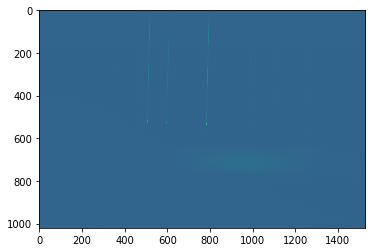

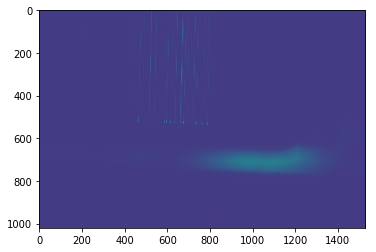

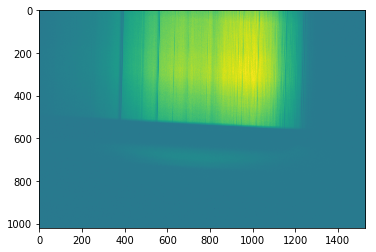

In [26]:
plt.imshow(avg_HElamp) 
plt.show()

plt.imshow(avg_NElamp) 
plt.show()

plt.imshow(avg_SUN) 
plt.show()

#Plotting the CCD frames, in y(pixels) vs x(pixels)

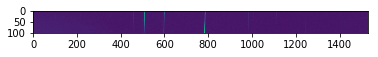

In [29]:
plt.imshow(avg_HElamp[400:500,:])

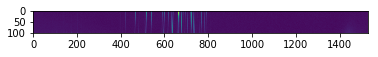

In [31]:
plt.imshow(avg_NElamp[400:500,:])

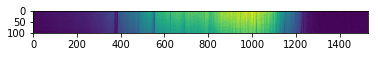

In [32]:
plt.imshow(avg_SUN[400:500,:])

In [34]:
HElamp_good = np.asarray(avg_HElamp[400:500,:]).mean(axis=0)
NElamp_good = np.asarray(avg_NElamp[400:500,:]).mean(axis=0)
SUN_good  = np.asarray(avg_SUN[400:500,:]).mean(axis=0)

#Taking the average of the desired slice representing
#the slit out of the CCD

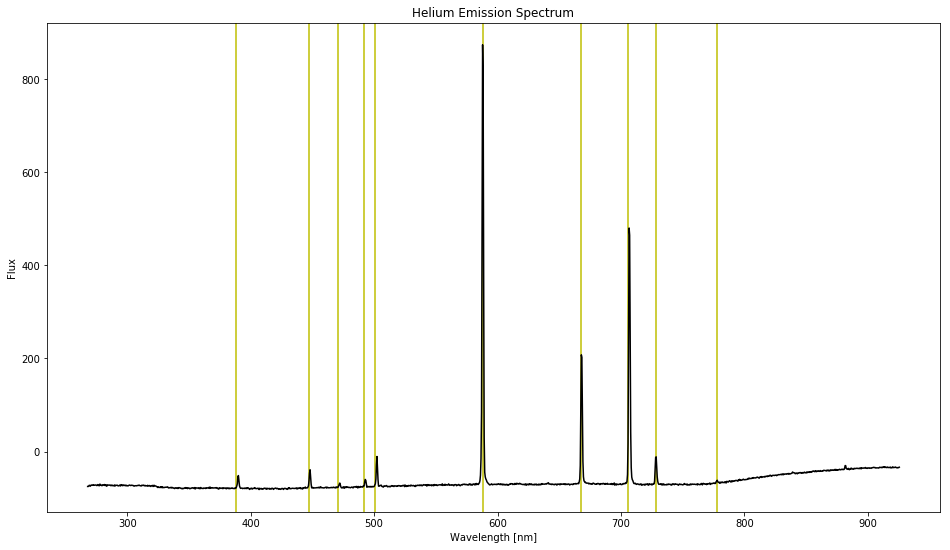

In [149]:
example_lines = [588, 668, 706, 388, 447, 471, 492, 501, 728, 778, ]
#Lines representing the emission lines of Helium
stretch = 0.43
shift = 268
#Trial and error shift and stretch values
plt.figure(figsize=(16,9))
#Changing figure size
for line in example_lines:
    plt.axvline(line,color='y')
#Plotting example emission lines
plt.plot(np.flip(np.arange(len(HElamp_good)),0)*stretch+shift, 
         (HElamp_good), 'k-') #np.flip(~~~) reverses the array inside it.
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.title('Helium Emission Spectrum')
plt.show()

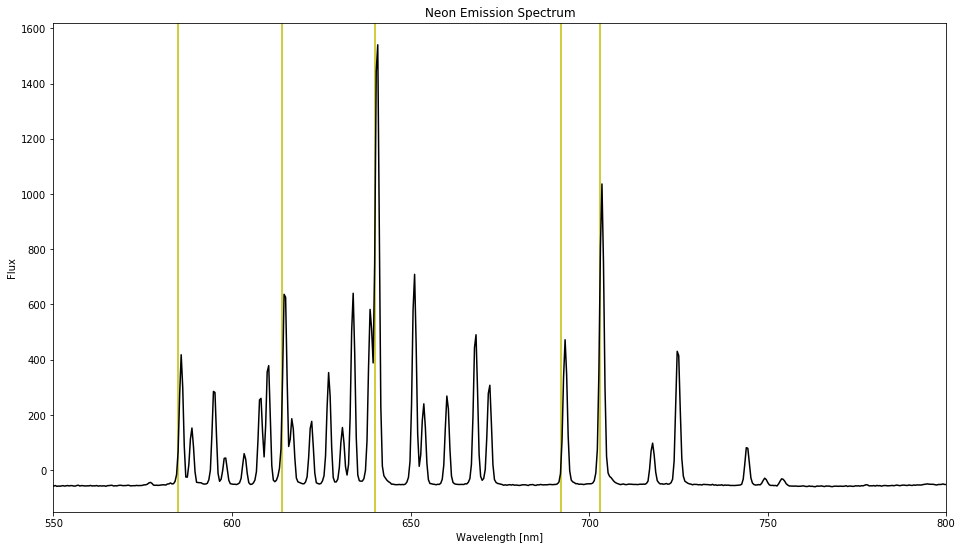

In [147]:
example_lines = [585, 614, 640, 692, 703]
#Lines representing the emission lines of Neon
stretch = 0.43
shift = 268
#Trial and error shift and stretch values
plt.figure(figsize=(16,9))
#Changing figure size
for line in example_lines:
    plt.axvline(line,color='y')
#Plotting example emission lines
plt.plot(np.flip(np.arange(len(NElamp_good)),0)*stretch+shift,
         NElamp_good, 'k-') #np.flip(~~~) reverses the array inside it.
plt.xlim(550,800)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.title('Neon Emission Spectrum')
plt.show()

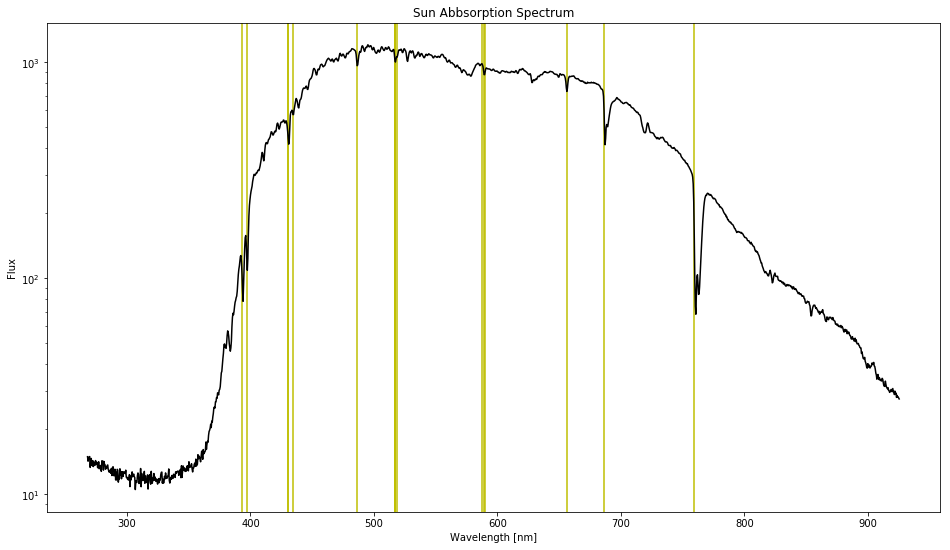

In [145]:
example_lines = [396.847, 393.366, 434.047, 430.790, 430.774, 486.134, 
                 656.281, 589.592, 588.995, 587.5618, 518.362, 517.270, 
                 516.891, 516.733, 759.370, 686.719]
#Lines representing the Fraunhofer lines
stretch = 0.43
shift = 268
#Trial and error shift and stretch values
plt.figure(figsize=(16,9))
#Changing figure size
for line in example_lines:
    plt.axvline(line,color='y')
#Plotting example emission lines
plt.plot(np.flip(np.arange(len(SUN_good)),0)*stretch+shift, SUN_good,
         'k-') #np.flip(~~~) reverses the array inside it.
plt.yscale("log")
#Plotting the y axis in a logarithmic scale
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.title('Sun Abbsorption Spectrum')
plt.show()